In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Implemented Artificial Neural Network on MNist dataset with an
accuracy of 98%


In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.#minist dataset contains of images of numbers from 0-9.Each image is of 28x28 resolution and each cell is of a pixel of the image.We need to classify the pixel data into any one of the images of numbers

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape#60,000 images each of 28x28 array and each cell is a pixel of image

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:5]#first image is a 5,2nd is a 0 and so on....

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#input layer where we flatten the inputs
    tf.keras.layers.Dense(128,activation='relu'),#hidden layer with 128 neurons
    tf.keras.layers.Dropout(0.2),#20% of the neurons in the hidden layer will be switched off
    tf.keras.layers.Dense(10)#output layer with 10 categories as numbers are from [0,9]
])

In [ ]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
'''
The line of code you provided defines a loss function for a neural network in TensorFlow using the Keras API:

```python
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
```

### Explanation:

- **`tf.keras.losses.SparseCategoricalCrossentropy`**: This is a built-in loss function in TensorFlow's Keras API, used for multi-class classification problems. It is used when the labels are provided as integers (sparse format) rather than one-hot encoded vectors.

- **`from_logits=True`**: This parameter indicates that the input to the loss function is raw logits rather than probabilities. Logits are the raw, unnormalized scores output by the last layer of the neural network. When `from_logits=True`, the loss function applies the softmax activation function internally to convert the logits to probabilities before computing the cross-entropy loss.

### When to Use `SparseCategoricalCrossentropy`:

- **Sparse Labels**: This loss function is used when your target labels are integers. For example, if you have three classes, your labels might be `[0, 1, 2]` rather than one-hot encoded vectors like `[[1, 0, 0], [0, 1, 0], [0, 0, 1]]`.

- **Classification Problems**: This loss function is typically used for classification problems where you want to classify inputs into one of several classes.

### Example Use Case:

Let's say you are working on a classification problem with three classes and your model outputs raw logits. Here is how you might compile a model using this loss function:

```python
import tensorflow as tf

# Example model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)  # No activation here since we'll use from_logits=True
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Example data (X_train: features, y_train: labels)
# X_train should have shape (num_samples, 784)
# y_train should have shape (num_samples,) with integer labels
X_train = ...  # Your training data
y_train = ...  # Your training labels

# Train the model
model.fit(X_train, y_train, epochs=10)
```

### Why Use `from_logits=True`?

- **Numerical Stability**: Using logits directly can be more numerically stable. Applying the softmax activation within the loss function can prevent issues related to floating-point precision.
- **Simplified Model Output**: By setting `from_logits=True`, you can avoid adding a separate softmax layer at the end of your model, simplifying your model definition.

### Summary:

The code `loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` defines a loss function that computes the sparse categorical cross-entropy between the labels and the logits output by the model. This is particularly useful for classification problems with integer labels and models that output raw logits.
'''

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2967 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1455 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9766


In [ ]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9785


[0.07458296418190002, 0.9785000085830688]

In [ ]:
test_image=x_test[0]

In [ ]:
logits=model.predict(np.expand_dims(test_image,axis=0))
'''
1. np.expand_dims(test_image, axis=0)
np.expand_dims: This function is from the NumPy library and is used to expand the shape of an array by inserting a new axis at the specified position.
test_image: This is the input image that you want to make a prediction on. It is assumed to be a NumPy array.
axis=0: This specifies that the new axis should be inserted at position 0, effectively adding a new dimension to the array.
Purpose:
Neural network models in TensorFlow/Keras typically expect a batch of inputs, even if it's just a single image. If test_image has a shape like (28, 28) (for a 28x28 grayscale image) or (28, 28, 3) (for a 28x28 RGB image), np.expand_dims(test_image, axis=0) will add a batch dimension, resulting in shapes (1, 28, 28) or (1, 28, 28, 3), respectively. This new shape indicates a batch of one image.
'''



1/1 [==============================] - 0s 60ms/step


Logit in Logistic Regression
Logit refers to the natural logarithm of the odds of the probability of an event occurring in logistic regression. In the context of logistic regression, the logit function is the link function that connects the linear predictor to the probability of the outcome.

Definition of Logit:
For a binary classification problem where
𝑝
p is the probability of the positive class, the logit is defined as:

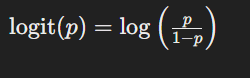


In [ ]:
np.expand_dims(test_image,axis=0).shape

(1, 28, 28)

In [ ]:
probabilities=tf.nn.softmax(logits).numpy()#softmax is an activation function
#Softmax function converts logits to probabilities
probabilities

array([[5.8914736e-08, 3.4065624e-09, 2.5905324e-06, 3.5163987e-04,
        3.8137500e-13, 1.4113893e-07, 2.0256064e-13, 9.9964178e-01,
        8.4515825e-08, 3.7325728e-06]], dtype=float32)

In [ ]:
predicted_class=np.argmax(probabilities)
predicted_class

7

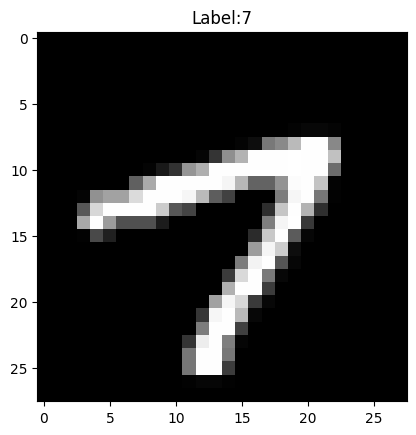

In [ ]:
plt.imshow(x_train[101],cmap='gray')#gray colormap to show the image in grayscale
plt.title(f'Label:{y_train[101]}')
plt.show()